- 역전파 과정 직접 구현하기
- 각각의 오차 변화를 시각화(seaborn)
- 사용 데이터 : citrus

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [79]:
df = pd.read_csv('citrus.csv')

first_time = False
if first_time:
    dataset = df.to_numpy()
    
    # change class names to numbers
    # orange ->1, grapefruit->0
    for i in range(10000):
        if dataset[i,0]=='orange':
            dataset[i,0]=1
        if dataset[i,0]=='grapefruit':
            dataset[i,0]=0       
        
    dataset = dataset.astype(float)
    np.save('citrus', dataset)       
else:    
    # once saved just load
    dataset=np.load('citrus.npy')

In [80]:
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


### data visualization for citrus.csv

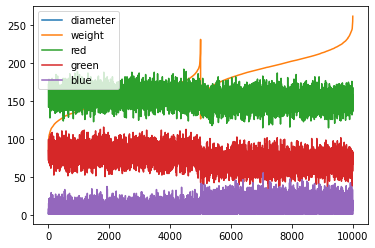

In [81]:
%matplotlib inline

df.plot()
plt.show()

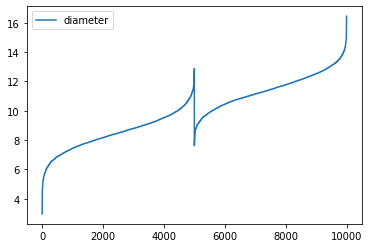

In [82]:
df[['diameter']].plot()

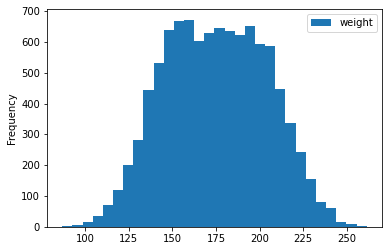

In [83]:
df[['weight']].plot(bins=30, kind='hist')

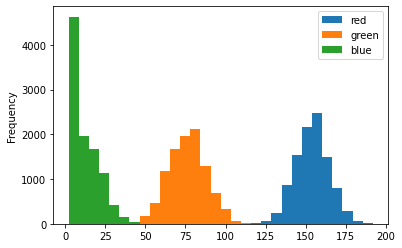

In [84]:
df[['red','green', 'blue']].plot(bins=30, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49c057cbe0>,
      dtype=object)

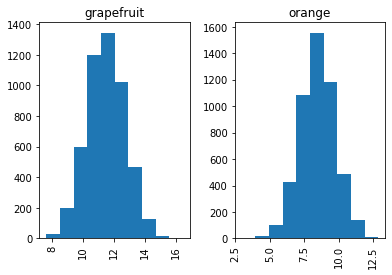

In [85]:
df[['diameter']].hist(by=df.name)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49c0416a58>,
      dtype=object)

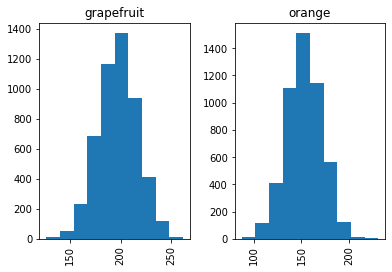

In [86]:
df[['weight']].hist(by=df.name)

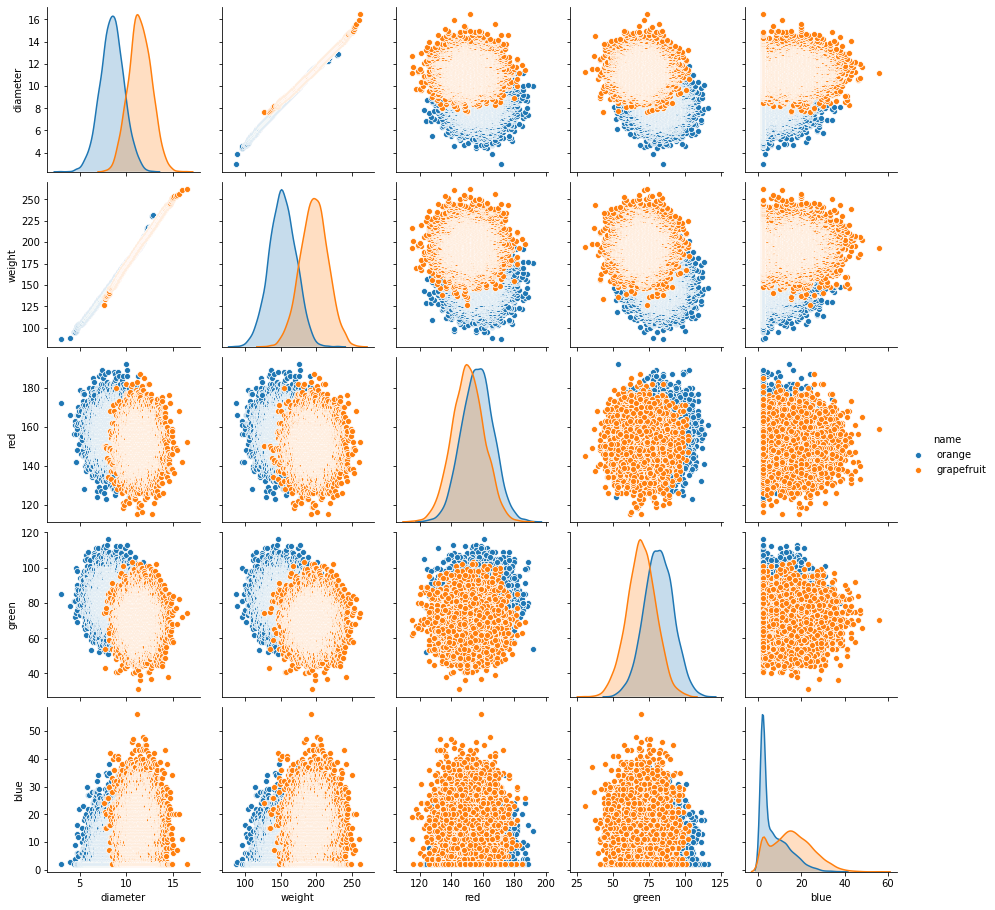

In [87]:
sns.pairplot(data=df, hue="name")

### input data split

In [88]:
N = dataset.shape[0]

N_Test = N // 5

N_Train = N - N_Test

np.random.seed(2020)
test_idx = np.random.choice(N, N_Test, replace = False)
Test_data = dataset[test_idx]
train_idx = np.setdiff1d(np.arange(N), test_idx)
Train_data = dataset[train_idx]
del(test_idx, train_idx)


print('Train dataset : Test dateset')
print(Train_data.shape, Test_data.shape)


print('numbers of orange class and grapefruit class in train data') 
print(np.count_nonzero(Train_data[:,0]),':', Train_data.shape[0] - np.count_nonzero(Train_data[:, 0]))
print('numbers of orange class and grapefruit class in test data') 
print(np.count_nonzero(Test_data[:,0]),':', Test_data.shape[0] - np.count_nonzero(Test_data[:, 0]))

Train dataset : Test dateset
(8000, 6) (2000, 6)
numbers of orange class and grapefruit class in train data
3994 : 4006
numbers of orange class and grapefruit class in test data
1006 : 994


In [89]:
X_train = Train_data[:,1:].T
Y_train = Train_data[:,0]
print('Train data shape : ', X_train.shape, Y_train.shape)

X_test = Test_data[:,1:].T
Y_test = Test_data[:,0]
print('Test data shape : ',X_test.shape, Y_test.shape)

Train data shape :  (5, 8000) (8000,)
Test data shape :  (5, 2000) (2000,)


In [90]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

# sigmoid is defined in scipy as expit more safely
from scipy.special import expit


In [91]:
def initialize(X):
    np.random.seed(2020)
    n = X.shape[0]
    W = np.random.rand(1, n)*0.1
    b = 0
    return W,b

In [92]:
def forward_propagation(X, W, b):
    """
    Argument :
    X -- input data
    W -- weights of shape (1,5)
    b -- bias of shape (1,1)
    
    Returns :
    A -- the sigmoid output 
       
    """
    
    Z = np.dot(W, X) + b
    A = expit(Z)
    
    return A

In [93]:
def cross_entropy_loss(A,Y):
    """
    Arguments:
    A : network output
    Y : labels
    
    Returns:
    loss : total cross-entropy loss 
        """
    
    # clipping before log function
    eps = 1e-16
    A = np.clip(A,eps,1-eps)
    
    # binary cross-entropy loss
    loss = - np.mean(Y*np.log(A) + (1-Y)*np.log(1 - A))
        
    # make cost into a scalar (shape=())
    loss = np.squeeze(loss)
    return loss
   

In [94]:
W,b = initialize(X_train)
A = forward_propagation(X_train,W,b)
cost = cross_entropy_loss(A, Y_train)
print(cost)

14.258474354941452


In [95]:
W,b = initialize(X_train)
lr = 0.01

In [96]:
dW_=[]
db_=[]

N=X_train.shape[1]
A = forward_propagation(X_train,W,b)
db= np.mean(A-Y_train)
dW = np.dot(A-Y_train, X_train.T) / N
#print(W)
#print(b)
W = W - lr*dW
b = b - lr*db
dW_.append(dW)
db_.append(db)
print(dW)
print(db)


[[ 5.74168625 98.71292749 75.59737499 35.085125    7.817     ]]
0.5007499999486287


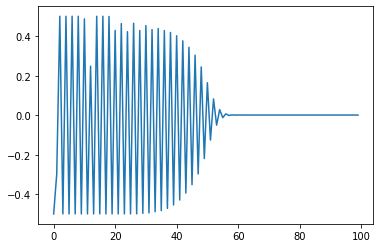

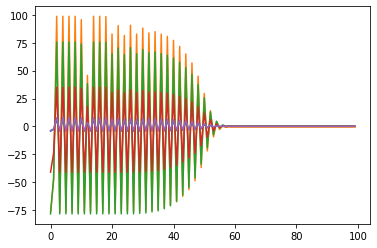

In [97]:
%matplotlib inline

N=X_train.shape[1]
db_=[]
dW_=[]
for _ in range(100):
    A = forward_propagation(X_train,W,b)
    db = np.mean(A-Y_train)
    dW = np.dot(A-Y_train, X_train.T) / N
    W = W - lr*dW
    b = b - lr*db
    db_.append(db)
    dW_.append(dW[0])
    #print(dW)

plt.plot(db_)
plt.show()

plt.figure()
plt.plot(dW_)


In [98]:
A = forward_propagation(X_train, W,b)
db = np.mean(A-Y_train)
dW = (A-Y_train)@X_train.T / X_train.shape[1]
print('db : ', db)
print('  dW :',dW.round(3))
print('    old W :',W)
W = W - lr*dW
print('    new W :',W)
print('      old b :',b)
b = b - lr*db
print('      new b :', b)

db :  0.0009156506766287435
  dW : [[-0.026 -0.466  0.45   0.135  0.201]]
    old W : [[-0.09490579 -2.45740155  1.88781159  1.96394118 -0.89522736]]
    new W : [[-0.09464146 -2.45274216  1.88331442  1.9625942  -0.89723931]]
      old b : 0.009387389706219322
      new b : 0.009378233199453035


In [99]:
def backward_propagation(X,Y,W,b):
    
    # forward propagation 
    A = forward_propagation(X,W,b)
            
    # backward propagation
    N = X.shape[1]
    dW= np.dot(A-Y, X.T) / N
    db= np.sum(A-Y) / N
    
    return dW, db

In [100]:
def neural_net(X,Y,W,b,nitr,lr):
    """
    Arguments:
    W : weights of shape (1,5)
    b : bias of shape (1,1)
    X : data samples
    Y : targets
    nitr : number of iterations of optimization loop
    lr : learning rate
        
    Returns:
    w,b
    cost_ : list of costs which will be used to plot
    """
    
    cost_=[]
    
    print(f'Iterating {nitr} times....')
    
    for i in range(nitr):
        
        # forward feeding
        A = forward_propagation(X,W,b)
        
        # caculate cost 
        cost = cross_entropy_loss(A, Y)
        cost_.append(cost)
        
        # backward propagation
        dW,db = backward_propagation(X, Y, W, b)
        
        # update rule
        W = W - lr*dW
        b = b - lr*db
    
    return cost_, W, b

In [101]:
W,b=initialize(X_train)
cost_,w,b = neural_net(X_train,Y_train,W,b,nitr=1000,lr=0.01)

Iterating 1000 times....


In [102]:
W

array([[0.09862768, 0.08733919, 0.05097455, 0.02718357, 0.03369187]])

In [103]:
b

0.012380878761600864

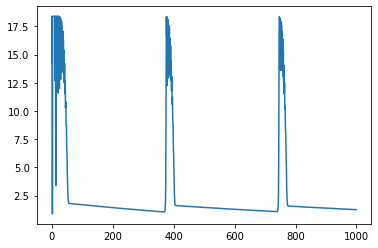

In [104]:
plt.plot(cost_)

In [105]:
cost_[-1]

1.2580116772074648

In [106]:
def predict(W,b,X):
    N=X.shape[1]
    Y_pred=np.zeros((1,N))
    
    A=forward_propagation(X,W,b)
    
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_pred[0,i]=1
        #else:
        #    Y_pred[0,i]=0
    return Y_pred

In [107]:
### Start training 
W,b=initialize(X_train)

Iterating 5000 times....
W is [[ 0.08094    -0.11776578  0.07697912  0.11929053 -0.10592793]], b is 0.00040735786723183784
Final cost is 0.18717093576925045

Train accuracy : 92.35%

Test accuracy : 92.95%


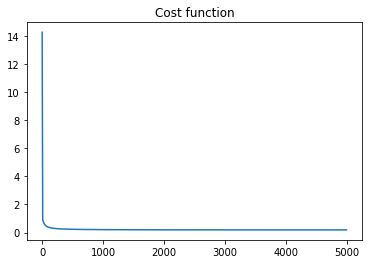

In [108]:
# neural_net
cost_, W, b = neural_net(X_train,Y_train,W,b,nitr=5000,lr=0.0001)

# print W, b and plot cost_ 
print(f'W is {W}, b is {b}')
print(f'Final cost is {cost_[-1]}')
plt.plot(cost_)
plt.title('Cost function')

# Train accuracy 
Y_pred=predict(W,b,X_train)
print(f"\nTrain accuracy : {100-np.mean(np.abs(Y_pred - Y_train))*100}%")

# Test accuracy (prediction on the test dataset)
Y_test_pred=predict(W,b,X_test)
print(f"\nTest accuracy : {100-np.mean(np.abs(Y_test_pred - Y_test))*100}%")

> 인자를 다르게 줘서 실험했었는데 학습률이 0.1일 때 93%에서 진동하였고 0.001의 학습률에서 약 94~95%의 정확도를 보였습니다.